
# Air Quality and COVID-19 Infection Rates
For this project, our goal is to investigate a **possible** relationship between Air Quality and COVID-19 Infection Rates. To that end, we merged an Air Quality dataset with a COVID-19 dataset, performed preprocessing before and after the merge, trained a regression model on the merged dataset, and performed predictions to test the accuracy of our model.

As an exploration, we attempted to exhaust all relevant regression models whose parameters have been appropriately tuned (if possible), from Support Vector Machines to Linear Regressors, which is what we settled with. All relevant preprocessing steps, from data cleaning, feature renaming and imputation, to pruning, feature selection and standardization, have also been taken.

In order to simplify our problem, we have decided to only focus on California Air Quality and COVID-19 datasets. The data were sourced directly from the government agencies of the state of California. This choice is motivated by the difficulty of procuring day-to-day Air Quality and COVID-19 data from the Philippines. We require day-to-day data for a more granular data source.

Because our preprocessed dataset only holds continuous quantitative values, regression is the most appropriate modeling approach.

**Important:** Because this is an exploratory project, we are not absolutely certain that there exists a significant relationship between Air Quality and COVID-19 datasets. Furthermore, our results, significant or not, can only lend support to hypotheses surrounding Air Quality and COVID-19.

## Importing the Datasets
Let us look at the samples, features, and other details regarding the dataset so that we know what we're dealing with. But first, we need to import the datasets into manipulable dataframes.

In [1431]:
# Set Jupyter Notebook to clear all workspace variables before the next complete run
%reset -f
# Set Jupyter Notebook to print out all interactions. This makes all "display" command from
%config InteractiveShell.ast_node_interactivity = 'all'

# Fetching all Air Quality datasets into their dataframes
# Perform immediate concatenation per year
import os
import pandas as pd

# Initialize datasets using co (do not add extra datasets to dir)
dir = 'CAdata/'
colidx = [0,2,4,17]                             # column indexes to use
innerkeys = ['Date', 'Site ID', 'COUNTY']       # Merge on Date, Site ID, and COUNTY
dataA2020 = pd.read_csv(dir + 'cf-2020-co.csv', parse_dates=True, usecols=colidx)
dataA2021 = pd.read_csv(dir + 'cf-2021-co.csv', parse_dates=True, usecols=colidx)
dataA2022 = pd.read_csv(dir + 'cf-2022-co.csv', parse_dates=True, usecols=colidx)

with os.scandir(dir) as datasets:
    for dataset in datasets:
        if dataset.is_file() and 'co' not in dataset.name:
            temp = pd.read_csv(dataset, parse_dates=True, usecols=colidx)
            if '2020' in dataset.name:
                dataA2020 = pd.merge(dataA2020, temp, how='outer', on=innerkeys)
            elif '2021' in dataset.name:
                dataA2021 = pd.merge(dataA2021, temp, how='outer', on=innerkeys)
            elif '2022' in dataset.name:
                dataA2022 = pd.merge(dataA2022, temp, how='outer', on=innerkeys)

# Parse Dates to date
dataA2020['Date'] = pd.to_datetime(dataA2020['Date'])
dataA2021['Date'] = pd.to_datetime(dataA2021['Date'])
dataA2022['Date'] = pd.to_datetime(dataA2022['Date'])
dataA2020.head()
dataA2021.head()
dataA2022.head()

,Date,Site ID,Daily Max 8-hour CO Concentration,COUNTY,Daily Max 1-hour NO2 Concentration,Daily Max 8-hour Ozone Concentration,Daily Mean Pb Concentration,Daily Mean PM10 Concentration,Daily Mean PM2.5 Concentration,Daily Max 1-hour SO2 Concentration
0,2020-01-01,60010009,0.7,Alameda,21.3,0.020,NaN,NaN,13.1,NaN
1,2020-01-02,60010009,0.7,Alameda,29.4,0.011,NaN,NaN,7.6,NaN
2,2020-01-03,60010009,0.9,Alameda,31.9,0.007,NaN,NaN,15.0,NaN
3,2020-01-04,60010009,0.8,Alameda,23.0,0.024,NaN,NaN,9.5,NaN
4,2020-01-05,60010009,0.7,Alameda,22.9,0.030,NaN,NaN,6.1,NaN


,Date,Site ID,Daily Max 8-hour CO Concentration,COUNTY,Daily Max 1-hour NO2 Concentration,Daily Max 8-hour Ozone Concentration,Daily Mean Pb Concentration,Daily Mean PM10 Concentration,Daily Mean PM2.5 Concentration,Daily Max 1-hour SO2 Concentration
0,2021-01-01,60010009,0.7,Alameda,25.0,0.019,NaN,NaN,14.2,NaN
1,2021-01-02,60010009,0.7,Alameda,25.2,0.014,NaN,NaN,9.4,NaN
2,2021-01-03,60010009,0.7,Alameda,21.9,0.016,NaN,NaN,13.7,NaN
3,2021-01-04,60010009,0.7,Alameda,22.2,0.030,NaN,NaN,8.2,NaN
4,2021-01-05,60010009,0.6,Alameda,19.1,0.023,NaN,NaN,6.6,NaN


,Date,Site ID,Daily Max 8-hour CO Concentration,COUNTY,Daily Max 1-hour NO2 Concentration,Daily Max 8-hour Ozone Concentration,Daily Mean Pb Concentration,Daily Mean PM10 Concentration,Daily Mean PM2.5 Concentration,Daily Max 1-hour SO2 Concentration
0,2022-01-01,60010009,0.7,Alameda,22.9,0.028,NaN,NaN,13.2,NaN
1,2022-01-02,60010009,0.6,Alameda,25.5,0.021,NaN,NaN,8.2,NaN
2,2022-01-03,60010009,0.6,Alameda,20.1,0.029,NaN,NaN,3.8,NaN
3,2022-01-04,60010009,0.4,Alameda,23.1,0.025,NaN,NaN,3.1,NaN
4,2022-01-05,60010009,0.4,Alameda,29.2,0.023,NaN,NaN,4.7,NaN


In [1432]:
# Group data by Date and Site ID, then by Date again to remove the Site ID feature
# Result would be mean measurements per day
# QUESTION: If regression is poor, let's do another one wherein we don't group by date
dataA2020 = dataA2020.drop(columns=['Site ID'], axis=1).groupby(by=['Date']).mean()
dataA2021 = dataA2021.drop(columns=['Site ID'], axis=1).groupby(by=['Date']).mean()
dataA2022 = dataA2022.drop(columns=['Site ID'], axis=1).groupby(by=['Date']).mean()
dataA2020.head()
dataA2021.head()
dataA2022.head()

,Daily Max 8-hour CO Concentration,Daily Max 1-hour NO2 Concentration,Daily Max 8-hour Ozone Concentration,Daily Mean Pb Concentration,Daily Mean PM10 Concentration,Daily Mean PM2.5 Concentration,Daily Max 1-hour SO2 Concentration
Date,,,,,,,
2020-01-01,0.636559,21.474615,0.030969,0.008000,20.491525,15.203015,0.972549
2020-01-02,0.697647,26.564463,0.028227,0.013000,18.468085,12.619178,1.077083
2020-01-03,0.845238,31.382500,0.026872,0.018990,21.129032,14.427778,1.044681
2020-01-04,1.049138,32.154152,0.029897,0.011074,29.707692,16.439510,0.983929
2020-01-05,0.792941,22.521138,0.032683,0.009000,13.905263,10.883221,0.766667


,Daily Max 8-hour CO Concentration,Daily Max 1-hour NO2 Concentration,Daily Max 8-hour Ozone Concentration,Daily Mean Pb Concentration,Daily Mean PM10 Concentration,Daily Mean PM2.5 Concentration,Daily Max 1-hour SO2 Concentration
Date,,,,,,,
2021-01-01,0.665000,22.645000,0.030844,0.021500,16.342105,14.104615,0.950000
2021-01-02,0.657895,22.458475,0.028398,0.010000,18.055556,12.370199,0.820455
2021-01-03,0.663158,21.499145,0.029293,0.008000,19.090909,14.147368,0.720930
2021-01-04,0.709740,27.123196,0.029920,0.006776,24.549550,14.059341,0.725000
2021-01-05,0.711842,27.218966,0.026878,0.027000,17.977528,12.394079,0.892857


,Daily Max 8-hour CO Concentration,Daily Max 1-hour NO2 Concentration,Daily Max 8-hour Ozone Concentration,Daily Mean Pb Concentration,Daily Mean PM10 Concentration,Daily Mean PM2.5 Concentration,Daily Max 1-hour SO2 Concentration
Date,,,,,,,
2022-01-01,0.556000,21.297581,0.034212,NaN,14.615385,10.865663,0.541860
2022-01-02,0.552688,25.704167,0.032208,NaN,13.600000,8.823744,0.730508
2022-01-03,0.700000,28.399194,0.030789,NaN,18.560345,8.744785,0.925581
2022-01-04,0.762667,29.063934,0.029168,NaN,21.894737,9.966061,1.142857
2022-01-05,1.031157,41.096725,0.022163,0.01166,35.697400,16.667782,1.211684


In [1433]:
dataA = pd.concat([dataA2020, dataA2021, dataA2022])    # Combine the three datasets
print("Combined dataset (Date set as index)")
dataA

Combined dataset (Date set as index)


,Daily Max 8-hour CO Concentration,Daily Max 1-hour NO2 Concentration,Daily Max 8-hour Ozone Concentration,Daily Mean Pb Concentration,Daily Mean PM10 Concentration,Daily Mean PM2.5 Concentration,Daily Max 1-hour SO2 Concentration
Date,,,,,,,
2020-01-01,0.636559,21.474615,0.030969,0.008000,20.491525,15.203015,0.972549
2020-01-02,0.697647,26.564463,0.028227,0.013000,18.468085,12.619178,1.077083
2020-01-03,0.845238,31.382500,0.026872,0.018990,21.129032,14.427778,1.044681
2020-01-04,1.049138,32.154152,0.029897,0.011074,29.707692,16.439510,0.983929
2020-01-05,0.792941,22.521138,0.032683,0.009000,13.905263,10.883221,0.766667
...,...,...,...,...,...,...,...
2022-12-27,0.814925,25.993333,0.027554,NaN,20.254386,8.294737,0.761111
2022-12-28,0.409756,20.100000,0.030041,NaN,12.185185,7.471809,0.555769
2022-12-29,0.392063,17.505660,0.028821,0.004000,12.609091,6.344000,0.361765


In [1434]:
new_names = ['CO conc (ppm)', 'NO2 conc (ppb)', 'O3 conc (ppm)',
             'Pb conc (ug/m3 SC)', 'PM10 conc (ug/m3 SC)',
             'PM2.5 conc (ug/m3 LC)', 'SO2 conc (ppb)']

# Rename columns
for i in range(len(new_names)):
    dataA.rename(columns={dataA.columns[i]: new_names[i]}, inplace=True)

print("Columns renamed:")
dataA.head()

Columns renamed:


,CO conc (ppm),NO2 conc (ppb),O3 conc (ppm),Pb conc (ug/m3 SC),PM10 conc (ug/m3 SC),PM2.5 conc (ug/m3 LC),SO2 conc (ppb)
Date,,,,,,,
2020-01-01,0.636559,21.474615,0.030969,0.008000,20.491525,15.203015,0.972549
2020-01-02,0.697647,26.564463,0.028227,0.013000,18.468085,12.619178,1.077083
2020-01-03,0.845238,31.382500,0.026872,0.018990,21.129032,14.427778,1.044681
2020-01-04,1.049138,32.154152,0.029897,0.011074,29.707692,16.439510,0.983929
2020-01-05,0.792941,22.521138,0.032683,0.009000,13.905263,10.883221,0.766667


In [1435]:
import seaborn as sns

# Deciding whether to drop or impute null values, so we check how many null values there are.
# Dataset A impute
print("A: Number of entries with null values:", dataA.isna().any(axis=1).sum())
print("A: Number of entries:", dataA.shape[0])

A: Number of entries with null values: 359
A: Number of entries: 1096


In [1436]:
# These imports are important, imputer relies on them.

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer   # Important!
from sklearn.impute import IterativeImputer     # default imputer is BayesianRidge

from sklearn.linear_model import BayesianRidge

# Other estimators (estimator = func()) to try
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Initialize imputer
imp = IterativeImputer(max_iter=100, random_state=1, verbose=True, estimator=BayesianRidge())
dataA[:] = imp.fit_transform(dataA)

print("After imputation:")
dataA.head()
print("A: Number of entries with null values after impute:", dataA.isna().any(axis=1).sum())
print("A: Number of entries:", dataA.shape[0])

[IterativeImputer] Completing matrix with shape (1096, 7)
[IterativeImputer] Change: 0.015027354506753809, scaled tolerance: 0.22167032967032968 
[IterativeImputer] Early stopping criterion reached.
After imputation:


,CO conc (ppm),NO2 conc (ppb),O3 conc (ppm),Pb conc (ug/m3 SC),PM10 conc (ug/m3 SC),PM2.5 conc (ug/m3 LC),SO2 conc (ppb)
Date,,,,,,,
2020-01-01,0.636559,21.474615,0.030969,0.008000,20.491525,15.203015,0.972549
2020-01-02,0.697647,26.564463,0.028227,0.013000,18.468085,12.619178,1.077083
2020-01-03,0.845238,31.382500,0.026872,0.018990,21.129032,14.427778,1.044681
2020-01-04,1.049138,32.154152,0.029897,0.011074,29.707692,16.439510,0.983929
2020-01-05,0.792941,22.521138,0.032683,0.009000,13.905263,10.883221,0.766667


A: Number of entries with null values after impute: 0
A: Number of entries: 1096


In [1437]:
colidx = [0,1,2,3,5,6]     # column indexes to use (based on preemptively looking at dataB)
dataB = pd.read_csv('datasets/us_covid_cases_and_deaths_by_state.csv', parse_dates=True, usecols=colidx)
sum_new_cases = dataB['new_case'] + dataB['pnew_case']
dataB.drop(['new_case', 'pnew_case'], axis=1, inplace=True)
dataB['sum_new_cases'] = sum_new_cases
dataB.head()

dataB.columns = ['Date', 'State', 'Total Cases', 'Confirmed Cases', 'Sum New Cases']

# Filter dataset B
dataB = dataB[dataB['State'] == 'CA']
dataB.head()

# Use Date as index, also drop the State
print("Dateset B finalized")
dataB['Date'] = pd.to_datetime(dataB['Date'])
dataB.set_index('Date', inplace=True)
dataB.sort_index(inplace=True)
dataB.drop('State', axis=1, inplace=True)
dataB.info()
dataB.head()

# Filter dataA with temporal restriction given by dataB
dataA = dataA[(dataA.index >= dataB.index.min()) &
              (dataA.index <= dataB.index.max())]

print("Filtered Dataset A")
dataA.head()

# With the printouts below, we find that there's no need to impute.
print("B: Number of entries with null values:", dataB.isna().any(axis=1).sum())
print("B: Number of entries:", dataB.shape[0])

,submission_date,state,tot_cases,conf_cases,sum_new_cases
0,03/11/2021,KS,297229,241035.0,0.0
1,12/01/2021,ND,163565,135705.0,809.0
2,01/02/2022,AS,11,NaN,0.0
3,11/22/2021,AL,841461,620483.0,1060.0
4,05/30/2022,AK,251425,NaN,0.0


,Date,State,Total Cases,Confirmed Cases,Sum New Cases
15543,06/11/2020,CA,139281,139281.0,3090.0
15553,08/18/2020,CA,632667,632667.0,4636.0
15562,02/25/2021,CA,3460326,3460326.0,4965.0
15573,02/10/2021,CA,3362981,3362981.0,8390.0
15576,09/06/2020,CA,732144,732144.0,4905.0


Dateset B finalized
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1001 entries, 2020-01-22 to 2022-10-18
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Total Cases      1001 non-null   int64  
 1   Confirmed Cases  1001 non-null   float64
 2   Sum New Cases    1001 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 31.3 KB


,Total Cases,Confirmed Cases,Sum New Cases
Date,,,
2020-01-22,0,0.0,0.0
2020-01-23,0,0.0,0.0
2020-01-24,0,0.0,0.0
2020-01-25,0,0.0,0.0
2020-01-26,0,0.0,0.0


Filtered Dataset A


,CO conc (ppm),NO2 conc (ppb),O3 conc (ppm),Pb conc (ug/m3 SC),PM10 conc (ug/m3 SC),PM2.5 conc (ug/m3 LC),SO2 conc (ppb)
Date,,,,,,,
2020-01-22,0.537931,27.727064,0.031293,0.005014,18.657480,9.687375,0.610294
2020-01-23,0.725882,27.785714,0.025749,0.010460,17.000000,9.269799,1.048571
2020-01-24,0.745122,27.568548,0.026038,0.015000,19.031250,10.956081,1.132353
2020-01-25,0.669663,23.787121,0.028571,0.009500,22.516667,13.901485,1.323684
2020-01-26,0.564634,18.748413,0.033178,0.007000,17.094737,14.294558,0.902857


B: Number of entries with null values: 0
B: Number of entries: 1001


In [1438]:
# Merging the two datasets (dataA & dataB)
data = dataA.merge(dataB, left_index=True, right_index=True)
data

,CO conc (ppm),NO2 conc (ppb),O3 conc (ppm),Pb conc (ug/m3 SC),PM10 conc (ug/m3 SC),PM2.5 conc (ug/m3 LC),SO2 conc (ppb),Total Cases,Confirmed Cases,Sum New Cases
Date,,,,,,,,,,
2020-01-22,0.537931,27.727064,0.031293,0.005014,18.657480,9.687375,0.610294,0,0.0,0.0
2020-01-23,0.725882,27.785714,0.025749,0.010460,17.000000,9.269799,1.048571,0,0.0,0.0
2020-01-24,0.745122,27.568548,0.026038,0.015000,19.031250,10.956081,1.132353,0,0.0,0.0
2020-01-25,0.669663,23.787121,0.028571,0.009500,22.516667,13.901485,1.323684,0,0.0,0.0
2020-01-26,0.564634,18.748413,0.033178,0.007000,17.094737,14.294558,0.902857,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-10-14,0.349091,16.385238,0.044713,0.005278,31.561404,13.642446,0.533607,11309237,10458792.0,7142.0
2022-10-15,0.298507,12.637168,0.042880,0.017986,25.722689,7.046203,0.423077,11309237,10458792.0,0.0
2022-10-16,0.330882,16.012174,0.039602,0.016383,20.123967,8.195031,0.450000,11309237,10458792.0,0.0


Number of entries remaining after pruning: 499


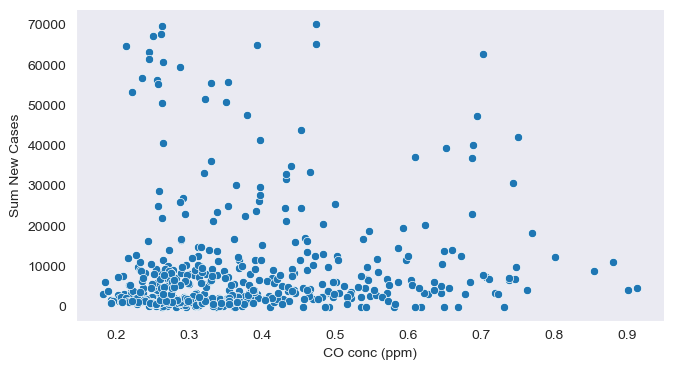

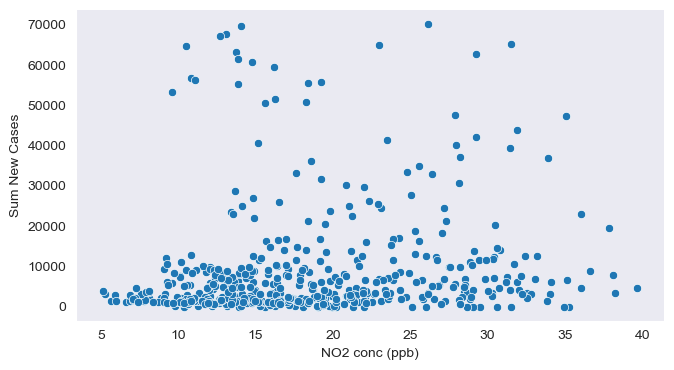

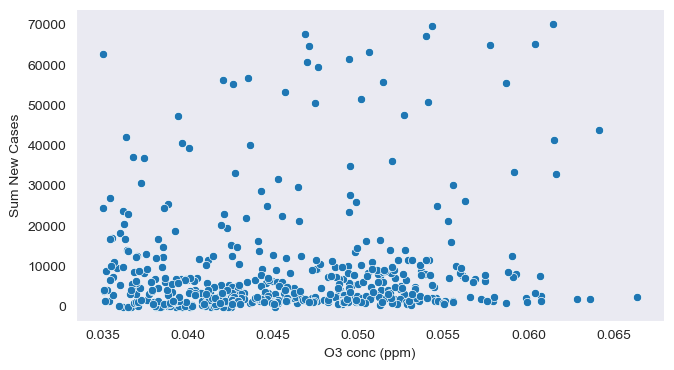

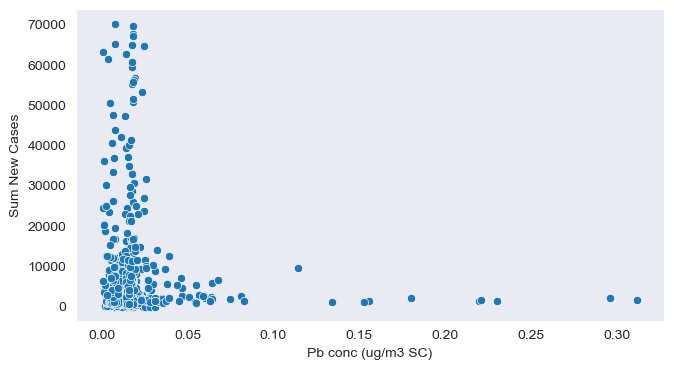

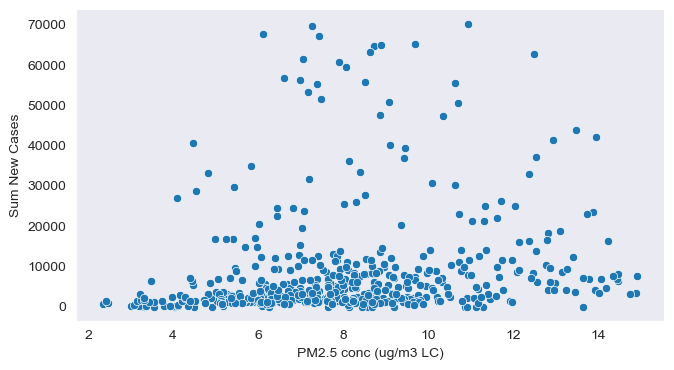

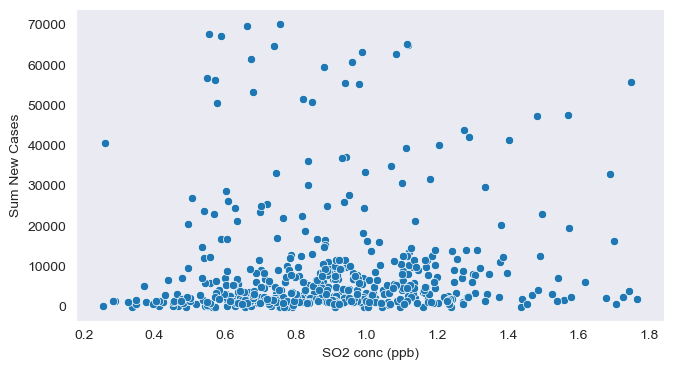

In [1439]:
import matplotlib.pyplot as plt
%matplotlib inline

# GENERATE SCATTERPLOTS FOR EDUCATED GUESSES OF WHAT COLUMNS TO USE
# DYNAMIC PRUNING
# IDEA: We focus on ambient level of pollutants and ignore sudden spikes in COVID-19 case data (i.e. data dumps).
# We also remove Dates where there are no new infections as their volume skews the data alot.
data = data[(data['Sum New Cases'] <= 73000) & (data['Sum New Cases'] > 1)]
data = data[(data['Total Cases'] > 0)]
data = data[(data['Confirmed Cases'] > 0)]
data = data[data['CO conc (ppm)'] <= 1.5]
# data = data[data['NO2 conc (ppb)'] > 1]
data = data[data['O3 conc (ppm)'] > 0.035]
data = data[data['Pb conc (ug/m3 SC)'] < 0.5]
data = data[data['PM10 conc (ug/m3 SC)'] < 100]
data = data[data['PM2.5 conc (ug/m3 LC)'] < 15]
data = data[data['SO2 conc (ppb)'] < 2.0]

# DROP COLUMNS HERE
data.drop(columns=['PM10 conc (ug/m3 SC)'], axis=1, inplace=True)
# data = data[['PM10 conc (ug/m3 SC)', 'Sum New Cases']]

for label in data.columns:
    if label in ['Sum New Cases', 'Total Cases', 'Confirmed Cases']: continue
    sns.set_style('dark')

    sns.relplot(x=label, y='Sum New Cases', data=data, height=3.8, aspect=1.8, kind='scatter')

print("Number of entries remaining after pruning:", data.shape[0])

<AxesSubplot:xlabel='CO conc (ppm)', ylabel='Sum New Cases'>

<AxesSubplot:xlabel='NO2 conc (ppb)', ylabel='Sum New Cases'>

<AxesSubplot:xlabel='O3 conc (ppm)', ylabel='Sum New Cases'>

<AxesSubplot:xlabel='Pb conc (ug/m3 SC)', ylabel='Sum New Cases'>

<AxesSubplot:xlabel='PM2.5 conc (ug/m3 LC)', ylabel='Sum New Cases'>

<AxesSubplot:xlabel='SO2 conc (ppb)', ylabel='Sum New Cases'>

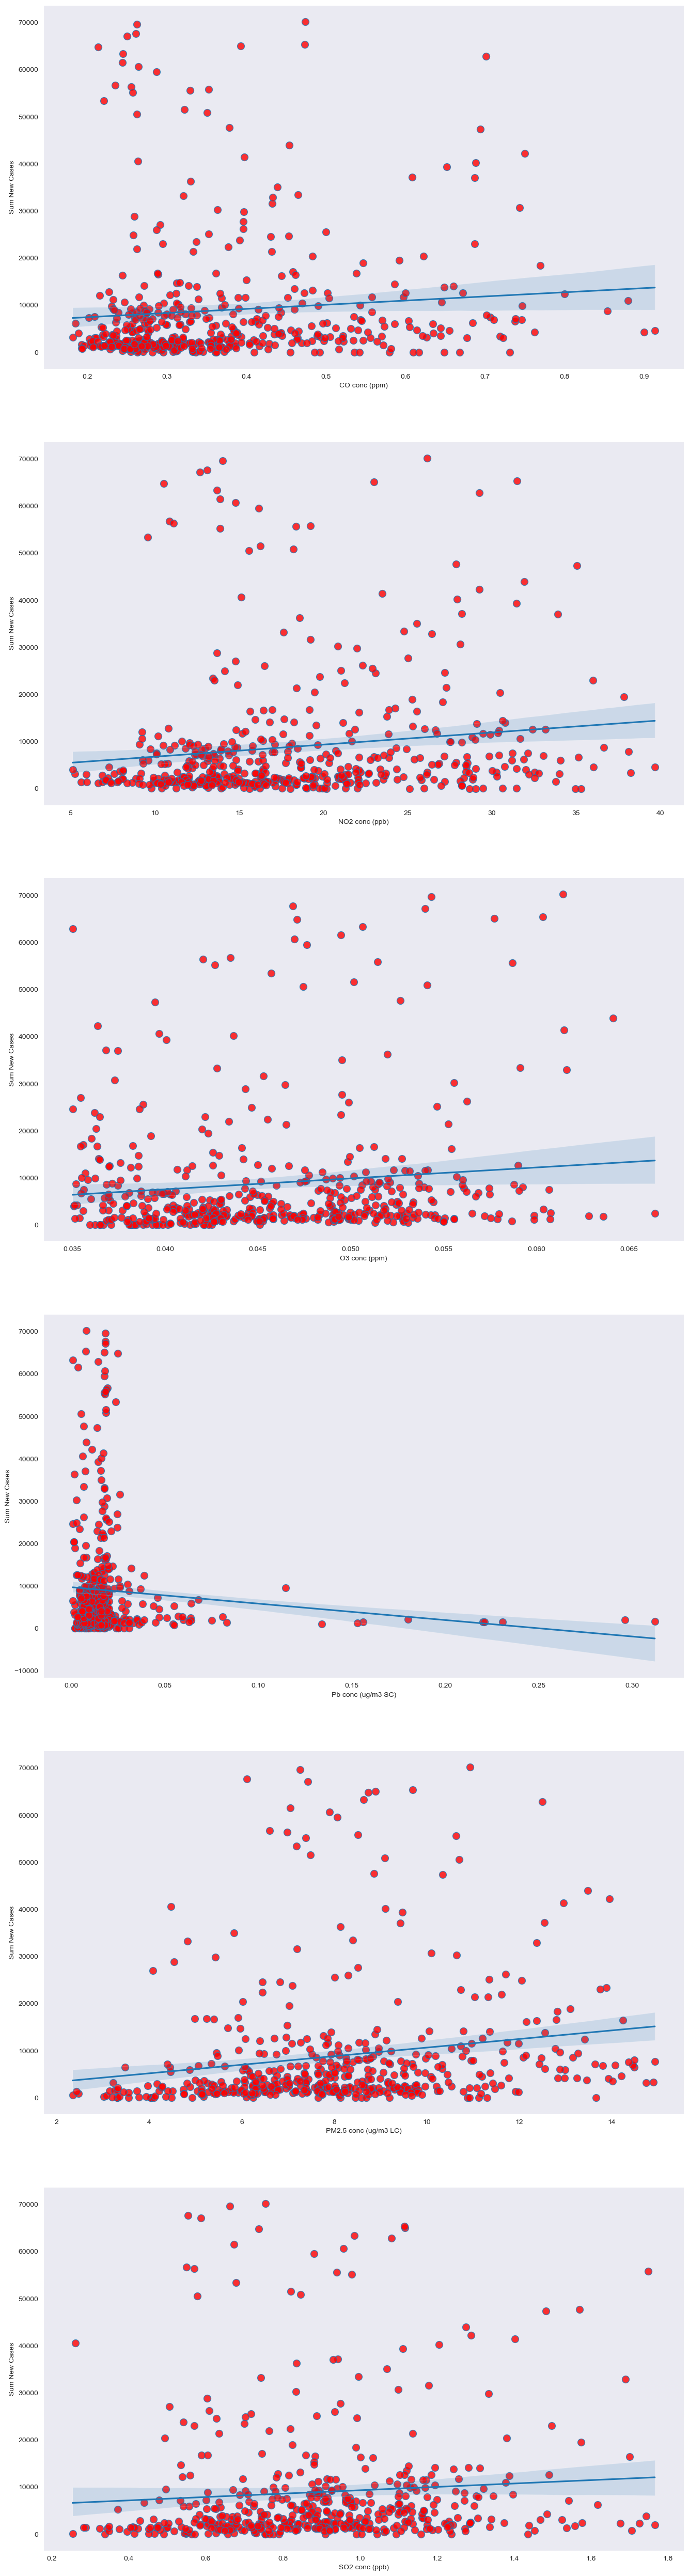

In [1440]:
fig, axs = plt.subplots(nrows=len(data.columns)-3, ncols=1, figsize=(16,64))

i = 0
for label in data.columns:
    if label in ["Sum New Cases", "Total Cases", "Confirmed Cases"]: continue
    sns.regplot(x=label, y='Sum New Cases', data=data, ci=95, scatter_kws={'s':100, 'facecolor':'red'}, ax=axs[i])
    i += 1

'Sum New Cases'

['CO conc (ppm)',
 'NO2 conc (ppb)',
 'O3 conc (ppm)',
 'Pb conc (ug/m3 SC)',
 'PM2.5 conc (ug/m3 LC)',
 'SO2 conc (ppb)',
 'Total Cases',
 'Confirmed Cases']

In [1442]:
# Linear Regression
# PREPARE FEATURES AND TARGET DATA (normalize first)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
scaler = StandardScaler()
X = data.iloc[:,0:-1] # feature matrix
X = scaler.fit_transform(X)
y = data.iloc[:,-1] # target vector

# PREPARE TRAIN AND TEST DATA
# NOTE: random_state = 1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# TODO: Hyperparameter tuning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
import sklearn.linear_model as sklm
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

,CO conc (ppm),NO2 conc (ppb),O3 conc (ppm),Pb conc (ug/m3 SC),PM2.5 conc (ug/m3 LC),SO2 conc (ppb),Total Cases,Confirmed Cases,Sum New Cases
Date,,,,,,,,,
2020-02-02,0.731325,20.180833,0.038462,0.025000,8.592361,1.094737,3,3.0,3.0
2020-02-03,0.282000,18.041969,0.038169,0.007180,4.044853,0.338028,6,6.0,3.0
2020-02-18,0.648387,29.483333,0.040142,0.015500,11.305473,1.044231,13,13.0,5.0
2020-02-19,0.535294,29.044000,0.042117,0.024000,13.664000,0.991489,15,15.0,2.0
2020-02-21,0.668122,35.289085,0.042520,0.008195,10.878610,0.753801,17,17.0,2.0
...,...,...,...,...,...,...,...,...,...
2022-09-30,0.339706,19.176724,0.048478,0.017473,7.819079,1.076923,11253453,10412352.0,11226.0
2022-10-06,0.352239,21.045045,0.054648,0.020241,11.354140,0.887179,11278564,10437463.0,25111.0
2022-10-07,0.398507,23.880180,0.053995,0.020548,10.971875,0.923077,11284337,10437463.0,11546.0


,CO conc (ppm),NO2 conc (ppb),O3 conc (ppm),Pb conc (ug/m3 SC),PM2.5 conc (ug/m3 LC),SO2 conc (ppb),Total Cases,Confirmed Cases
Date,,,,,,,,
2020-02-02,0.731325,20.180833,0.038462,0.025000,8.592361,1.094737,3,3.0
2020-02-03,0.282000,18.041969,0.038169,0.007180,4.044853,0.338028,6,6.0
2020-02-18,0.648387,29.483333,0.040142,0.015500,11.305473,1.044231,13,13.0
2020-02-19,0.535294,29.044000,0.042117,0.024000,13.664000,0.991489,15,15.0
2020-02-21,0.668122,35.289085,0.042520,0.008195,10.878610,0.753801,17,17.0
...,...,...,...,...,...,...,...,...
2022-09-30,0.339706,19.176724,0.048478,0.017473,7.819079,1.076923,11253453,10412352.0
2022-10-06,0.352239,21.045045,0.054648,0.020241,11.354140,0.887179,11278564,10437463.0
2022-10-07,0.398507,23.880180,0.053995,0.020548,10.971875,0.923077,11284337,10437463.0


LinearRegression()

Coefficients: [   3518.82528491   -3806.98409071    1579.0565471     -182.95362141
     410.36840965   -1098.70304601  117947.31103646 -109285.24651743]
Intercept: 8864.904962352819


In [1443]:
y_pred = regressor.predict(X_test)
y_pred

array([ 1906.61888731,  4120.11907749,  5665.61184007,  1005.0264629 ,
        6595.7727907 ,  6275.64286895, 11265.62628288, 10486.22279042,
        7528.96517272,  1206.27208003,  4280.0534249 ,  6513.62272033,
       27976.17563297,    37.8718433 ,  4589.4555758 ,  3535.28733939,
        5990.19005593,  6207.58616041,  1147.37081747,  4396.58015668,
        4195.03870848,  3932.45985696,  5309.95974661,  6490.00691156,
        4731.91330088,  5283.16818453,  5205.77955534, 18461.63575001,
        4296.96262137,  3885.7315664 ,  6273.10496885, 10559.82715506,
       22952.95702275,  5094.99088169,  4066.02654917, 26901.35147119,
        1855.71422671,  6085.04251569, 35020.82874419,  1471.79976971,
        1104.56158606,  5310.90121192,  4704.53954822,  4441.36282055,
        3239.97789833,  3286.17978824,  4288.61418705,  7918.38159553,
       11594.26468128, 30618.09664768, 11877.1798594 ,  3860.95162679,
       10904.54388099, 19509.55871316,  3335.94748711,  9260.73231429,
      

In [1444]:
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df

,Actual,Predicted
Date,,
2020-06-15,2597.0,1906.618887
2020-07-24,9212.0,4120.119077
2021-05-27,1418.0,5665.611840
2021-06-15,628.0,1005.026463
2020-11-15,10968.0,6595.772791
...,...,...
2022-08-23,36272.0,33967.083665
2020-05-28,2717.0,3109.996785
2021-07-16,4651.0,9867.891361


In [1445]:
residuals = y_test - y_pred
residuals

Date
2020-06-15     690.381113
2020-07-24    5091.880923
2021-05-27   -4247.611840
2021-06-15    -377.026463
2020-11-15    4372.227209
                 ...     
2022-08-23    2304.916335
2020-05-28    -392.996785
2021-07-16   -5216.891361
2020-06-07   -1700.849308
2021-02-17    1261.703558
Name: Sum New Cases, Length: 100, dtype: float64

<AxesSubplot:xlabel='Sum New Cases'>

Text(0.5, 0, 'y_test data')

Text(0, 0.5, 'Predictions')

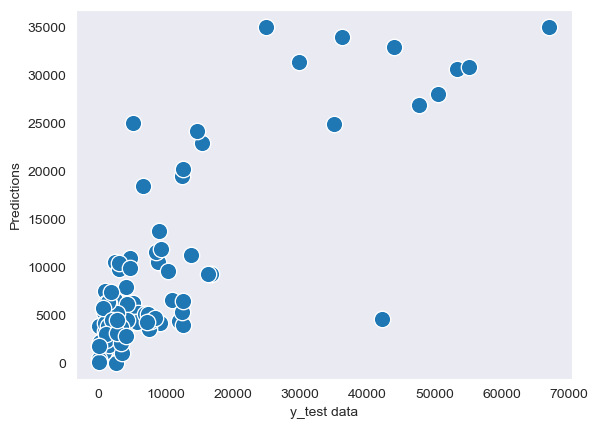

In [1446]:
sns.scatterplot(x=y_test, y = y_pred, s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions')

In [1447]:
f = open("log.out", "a")

from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(y_test,y_pred))
f.write('MAE: {}\n'.format(mean_absolute_error(y_test,y_pred)))

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))
f.write('MSE: {}\n'.format(mean_squared_error(y_test,y_pred)))

import numpy as np
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
f.write('RMSE: {}\n'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2 Score:", r2)      # We use this as our main metric
f.write('R2 Score: {}\n'.format(r2))

f.write('---\n')

MAE: 5122.135095236047


23

MSE 67747923.27719158


23

RMSE 8230.912663683876


24

R2 Score: 0.6342261070368445


29

4

In [1448]:
data = data.reset_index()
NewData = data
NewData

,Date,CO conc (ppm),NO2 conc (ppb),O3 conc (ppm),Pb conc (ug/m3 SC),PM2.5 conc (ug/m3 LC),SO2 conc (ppb),Total Cases,Confirmed Cases,Sum New Cases
0,2020-02-02,0.731325,20.180833,0.038462,0.025000,8.592361,1.094737,3,3.0,3.0
1,2020-02-03,0.282000,18.041969,0.038169,0.007180,4.044853,0.338028,6,6.0,3.0
2,2020-02-18,0.648387,29.483333,0.040142,0.015500,11.305473,1.044231,13,13.0,5.0
3,2020-02-19,0.535294,29.044000,0.042117,0.024000,13.664000,0.991489,15,15.0,2.0
4,2020-02-21,0.668122,35.289085,0.042520,0.008195,10.878610,0.753801,17,17.0,2.0
...,...,...,...,...,...,...,...,...,...,...
494,2022-09-30,0.339706,19.176724,0.048478,0.017473,7.819079,1.076923,11253453,10412352.0,11226.0
495,2022-10-06,0.352239,21.045045,0.054648,0.020241,11.354140,0.887179,11278564,10437463.0,25111.0
496,2022-10-07,0.398507,23.880180,0.053995,0.020548,10.971875,0.923077,11284337,10437463.0,11546.0
497,2022-10-13,0.332836,18.396364,0.046519,0.017320,11.032911,0.634211,11305666,10458792.0,21329.0


In [1449]:
# For CO conc (ppm) & Sum New Cases
## Perform regression modeling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
import calendar

# Convert datetime to int
#x = data['Date'].values.astype(int) / 10**9  # Convert to seconds (UNIX epoch start)
#x = x.reshape(-1, 1)


x = NewData['CO conc (ppm)']
y = NewData['Sum New Cases']

#--------------------------------------------------------------
# Linear regression model
#--------------------------------------------------------------
# Stastical approach
x_lms = sm.add_constant(x)
linear_model_stat = sm.OLS(y, x_lms)
lms_results = linear_model_stat.fit()
p_values = lms_results.pvalues[1:]

# Machine learning approach (no p-values)
linear_model = LinearRegression()
linear_model.fit(x_lms, y)
y_linear_pred = linear_model.predict(x_lms)

# Calculate R2 and RMSE for linear regression model
linear_r2 = r2_score(y, y_linear_pred)
linear_rmse = np.sqrt(mean_squared_error(y, y_linear_pred))

print("Model Evaluation")
print("\nLinear Regression: RMSE=%.2f, R2=%.2f" % (linear_rmse, linear_r2))
for i, p_value in enumerate(p_values.index):
  print(f'P({p_value}): {p_values[i]}')

if any(p_values <= 0.05):
  print("There is a significant relationship between the predictor and the response\n")
else:
  print("There is no significant relationship between the predictor and the response\n")


# Plot the model
import plotly.graph_objects as go

xtt = NewData['CO conc (ppm)']#.dt.strftime('%Y-%m-%d')
scatter_actual = go.Scatter(x=xtt, y=y, mode='markers', name='Actual', marker=dict(color='blue', opacity=0.3))

line_regression = go.Scatter(x=xtt, y=y_linear_pred, mode='lines', name='LR', line=dict(color='red', dash='dash'))

data = [scatter_actual, line_regression]

layout = go.Layout(xaxis=dict(title='CO conc (ppm)'),
                   yaxis=dict(title='Sum New Cases'),
                   title='Linear Regression Model for COVID-19 New Cases & CO conc (ppm)',
                   showlegend=True,
                   height=600)

fig = go.Figure(data=data, layout=layout)
fig.show()

LinearRegression()

Model Evaluation

Linear Regression: RMSE=13547.43, R2=0.01
P(CO conc (ppm)): 0.03949006032167536
There is a significant relationship between the predictor and the response



In [1450]:
# For NO2 conc (ppb) & Sum New Cases
## Perform regression modeling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
import calendar

# Convert datetime to int
#x = data['Date'].values.astype(int) / 10**9  # Convert to seconds (UNIX epoch start)
#x = x.reshape(-1, 1)


x = NewData['NO2 conc (ppb)']
y = NewData['Sum New Cases']

#--------------------------------------------------------------
# Linear regression model
#--------------------------------------------------------------
# Stastical approach
x_lms = sm.add_constant(x)
linear_model_stat = sm.OLS(y, x_lms)
lms_results = linear_model_stat.fit()
p_values = lms_results.pvalues[1:]

# Machine learning approach (no p-values)
linear_model = LinearRegression()
linear_model.fit(x_lms, y)
y_linear_pred = linear_model.predict(x_lms)

# Calculate R2 and RMSE for linear regression model
linear_r2 = r2_score(y, y_linear_pred)
linear_rmse = np.sqrt(mean_squared_error(y, y_linear_pred))

print("Model Evaluation")
print("\nLinear Regression: RMSE=%.2f, R2=%.2f" % (linear_rmse, linear_r2))
for i, p_value in enumerate(p_values.index):
  print(f'P({p_value}): {p_values[i]}')

if any(p_values <= 0.05):
  print("There is a significant relationship between the predictor and the response\n")
else:
  print("There is no significant relationship between the predictor and the response\n")


# Plot the model
import plotly.graph_objects as go

xtt = NewData['NO2 conc (ppb)']#.dt.strftime('%Y-%m-%d')
scatter_actual = go.Scatter(x=xtt, y=y, mode='markers', name='Actual', marker=dict(color='blue', opacity=0.3))

line_regression = go.Scatter(x=xtt, y=y_linear_pred, mode='lines', name='LR', line=dict(color='red', dash='dash'))

data = [scatter_actual, line_regression]

layout = go.Layout(xaxis=dict(title='NO2 conc (ppb)'),
                   yaxis=dict(title='Sum New Cases'),
                   title='Linear Regression Model for COVID-19 New Cases & NO2 conc (ppb)',
                   showlegend=True,
                   height=600)

fig = go.Figure(data=data, layout=layout)
fig.show()

LinearRegression()

Model Evaluation

Linear Regression: RMSE=13477.68, R2=0.02
P(NO2 conc (ppb)): 0.002211830227186298
There is a significant relationship between the predictor and the response



In [1451]:
# For O3 conc (ppm) & Sum New Cases
## Perform regression modeling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
import calendar

# Convert datetime to int
#x = data['Date'].values.astype(int) / 10**9  # Convert to seconds (UNIX epoch start)
#x = x.reshape(-1, 1)


x = NewData['O3 conc (ppm)']
y = NewData['Sum New Cases']

#--------------------------------------------------------------
# Linear regression model
#--------------------------------------------------------------
# Stastical approach
x_lms = sm.add_constant(x)
linear_model_stat = sm.OLS(y, x_lms)
lms_results = linear_model_stat.fit()
p_values = lms_results.pvalues[1:]

# Machine learning approach (no p-values)
linear_model = LinearRegression()
linear_model.fit(x_lms, y)
y_linear_pred = linear_model.predict(x_lms)

# Calculate R2 and RMSE for linear regression model
linear_r2 = r2_score(y, y_linear_pred)
linear_rmse = np.sqrt(mean_squared_error(y, y_linear_pred))

print("Model Evaluation")
print("\nLinear Regression: RMSE=%.2f, R2=%.2f" % (linear_rmse, linear_r2))
for i, p_value in enumerate(p_values.index):
  print(f'P({p_value}): {p_values[i]}')

if any(p_values <= 0.05):
  print("There is a significant relationship between the predictor and the response\n")
else:
  print("There is no significant relationship between the predictor and the response\n")


# Plot the model
import plotly.graph_objects as go

xtt = NewData['O3 conc (ppm)']#.dt.strftime('%Y-%m-%d')
scatter_actual = go.Scatter(x=xtt, y=y, mode='markers', name='Actual', marker=dict(color='blue', opacity=0.3))

line_regression = go.Scatter(x=xtt, y=y_linear_pred, mode='lines', name='LR', line=dict(color='red', dash='dash'))

data = [scatter_actual, line_regression]

layout = go.Layout(xaxis=dict(title='O3 conc (ppm)'),
                   yaxis=dict(title='Sum New Cases'),
                   title='Linear Regression Model for COVID-19 New Cases & O3 conc (ppm)',
                   showlegend=True,
                   height=600)

fig = go.Figure(data=data, layout=layout)
fig.show()

LinearRegression()

Model Evaluation

Linear Regression: RMSE=13518.89, R2=0.01
P(O3 conc (ppm)): 0.011850185140676633
There is a significant relationship between the predictor and the response

